In [16]:
import cv2 as cv2
import numpy as np
import os
import PIL
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
def binarize_images(x):
    """
    Convert images to range 0-1 and binarize them by making
    0 the values below 0.1 and 1 the values above 0.1.
    """
    x /= 255
    x[x > 0] = 1
    return x

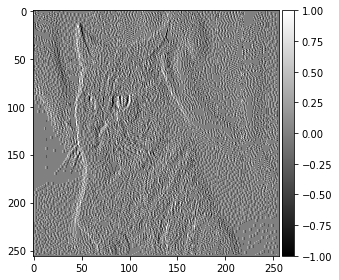

In [18]:
files=os.listdir('test/')
count0=0
array=[]
for file in files:
    image = Image.open('test/'+file)
    imagefinal=image.resize((256,256))
    imagefinal = imagefinal.convert('1')
    count0+=1
    edges_prewitt_horizontal = prewitt_h(imagefinal)
    edges_prewitt_vertical = prewitt_v(imagefinal)
    imshow(edges_prewitt_vertical, cmap='gray')
    break

In [5]:
files=os.listdir('test_zero/')
count0=0
array=[]
for file in files:
    image = Image.open('test_zero/'+file)
    imagefinal=image.resize((256,256))
    imagefinal = imagefinal.convert('1')
    im2arr = img_to_array(imagefinal)   
    im2arr=binarize_images(im2arr)
    edges_prewitt_horizontal = prewitt_h(imagefinal)
    edges_prewitt_vertical = prewitt_v(imagefinal)
    im2arr=im2arr.reshape(256,256)
    
    array.append(edges_prewitt_vertical)
    count0+=1

In [6]:
files=os.listdir('test_90/')
count90=0
array3=[]
for file in files:
    image = Image.open('test_90/'+file)
    imagefinal=image.resize((256,256))
    imagefinal = imagefinal.convert('1')
    imagefinal=imagefinal.rotate(90)
    im2arr = img_to_array(imagefinal) 
    im2arr=binarize_images(im2arr)
    edges_prewitt_horizontal = prewitt_h(imagefinal)
    edges_prewitt_vertical = prewitt_v(imagefinal)
    im2arr=im2arr.reshape(256,256)
    
    array3.append(edges_prewitt_vertical)
    count90+=1


In [7]:
files=os.listdir('test_180/')
array1=[]
count180=0
for file in files:
    image = Image.open('test_180/'+file)
    imagefinal=image.resize((256,256))
    imagefinal = imagefinal.convert('1')
    imagefinal=imagefinal.rotate(180)
    im2arr = img_to_array(imagefinal) 
    im2arr=binarize_images(im2arr)
    edges_prewitt_horizontal = prewitt_h(imagefinal)
    edges_prewitt_vertical = prewitt_v(imagefinal)
    im2arr=im2arr.reshape(256,256)
    
    count180+=1
    array1.append(edges_prewitt_vertical)


In [8]:
files=os.listdir('test_270/')
count270=0
array2=[]
for file in files:
    image = Image.open('test_270/'+file)
    imagefinal=image.resize((256,256))
    imagefinal = imagefinal.convert('1')
    imagefinal=imagefinal.rotate(270)
    im2arr = img_to_array(imagefinal) 
    im2arr=binarize_images(im2arr)
    edges_prewitt_horizontal = prewitt_h(imagefinal)
    edges_prewitt_vertical = prewitt_v(imagefinal)
    im2arr=im2arr.reshape(256,256)
   
    count270+=1
    array2.append(edges_prewitt_vertical)


In [9]:
array=np.array(array)
array1=np.array(array1)
array2=np.array(array2)
array3=np.array(array3)

In [10]:
finalarray=np.vstack((array,array1,array2,array3))
# TO SAVE RAM
del array
del array1
del array2
del array3

In [11]:
#we ave given class label of 0 for zero degrees
#we ave given class label of 90 for 90 degrees
#we ave given class label of 180 for 180 degrees
#we ave given class label of 270 for 270 degrees

finalclasslabels=[]
for i in range(count0):
    finalclasslabels.append(0)
for i in range(count90):
    finalclasslabels.append(1)
for i in range(count180):
    finalclasslabels.append(2)
for i in range(count270):
    finalclasslabels.append(3)


In [12]:
from sklearn.model_selection import train_test_split
xtrainfinal,xtestfinal,ytrainfinal,ytestfinal=train_test_split(finalarray,finalclasslabels,test_size=0.2,random_state=32)

In [13]:
from keras.utils import to_categorical
ytrainfinal1=to_categorical(ytrainfinal,4)
ytestfinal1=to_categorical(ytestfinal,4)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 

In [0]:
ACTIVITIES = {
   
 3: '270 degree',
2: '180 degree',
1: '90 degree',
0: 'zero degree',
   
  
}

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
def confusionmatrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [69]:
import warnings
warnings.filterwarnings('ignore')
classifier = Sequential()
classifier.add(Conv2D(96, (2, 2), input_shape = (256,256, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(256, (2, 2), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Conv2D(512, (2, 2), input_shape = (256,256, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(1024, (2, 2), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units = 3072, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 4, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])  
history=classifier.fit(xtrainfinal,ytrainfinal1, epochs =40, validation_data = (xtestfinal,ytestfinal1),batch_size=128)
scores = classifier.evaluate(xtestfinal,ytestfinal1, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
model_3_test = scores[1]
model_3_train = max(history.history['acc'])


Train on 7424 samples, validate on 1856 samples
Epoch 1/40
7424/7424 [==============================] - 13s 2ms/step - loss: 1.2442 - acc: 0.3627 - val_loss: 0.7684 - val_acc: 0.5032
Epoch 2/40
7424/7424 [==============================] - 11s 1ms/step - loss: 0.7818 - acc: 0.4958 - val_loss: 0.7622 - val_acc: 0.5140
Epoch 3/40
7424/7424 [==============================] - 11s 1ms/step - loss: 0.7669 - acc: 0.5082 - val_loss: 0.7381 - val_acc: 0.5194
Epoch 4/40
7424/7424 [==============================] - 11s 1ms/step - loss: 0.7318 - acc: 0.5178 - val_loss: 0.7081 - val_acc: 0.5453
Epoch 5/40
7424/7424 [==============================] - 11s 1ms/step - loss: 0.7293 - acc: 0.5353 - val_loss: 0.6971 - val_acc: 0.5927
Epoch 6/40
7424/7424 [==============================] - 11s 1ms/step - loss: 0.6954 - acc: 0.5787 - val_loss: 0.6558 - val_acc: 0.6255
Epoch 7/40
7424/7424 [==============================] - 11s 1ms/step - loss: 0.6715 - acc: 0.6149 - val_loss: 0.6188 - val_acc: 0.6627
Epoch 8

In [70]:
import pandas as pd
# Confusion Matrix

confusionmatrix(ytestfinall2,model.predict(xtestfinall2))

Pred,180 degree,270 degree,90 degree,zero degree
True,,,,
180 degree,430,38,0,2
270 degree,27,440,0,0
90 degree,1,0,451,25
zero degree,1,2,28,411


In [80]:
import warnings
warnings.filterwarnings('ignore')
model = keras.Sequential()
from keras import layers

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())


model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))
model.add(Dense(units = 4, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
   
history=model.fit(xtrainfinal,ytrainfinal1, epochs =100, validation_data = (xtestfinal,ytestfinal1),batch_size=8)
score = model.evaluate(xtestfinal,ytestfinal1, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
model_3_test = score[1]
model_3_train = max(history.history['acc'])


Train on 7424 samples, validate on 1856 samples
Epoch 1/100
7424/7424 [==============================] - 9s 1ms/step - loss: 1.0767 - acc: 0.4403 - val_loss: 0.9096 - val_acc: 0.4790
Epoch 2/100
7424/7424 [==============================] - 8s 1ms/step - loss: 0.8834 - acc: 0.4682 - val_loss: 0.8297 - val_acc: 0.5097
Epoch 3/100
7424/7424 [==============================] - 7s 1ms/step - loss: 0.8166 - acc: 0.4864 - val_loss: 0.7809 - val_acc: 0.5022
Epoch 4/100
7424/7424 [==============================] - 7s 997us/step - loss: 0.7818 - acc: 0.4904 - val_loss: 0.7654 - val_acc: 0.4801
Epoch 5/100
7424/7424 [==============================] - 7s 999us/step - loss: 0.7631 - acc: 0.4886 - val_loss: 0.7632 - val_acc: 0.5102
Epoch 6/100
7424/7424 [==============================] - 7s 1ms/step - loss: 0.7489 - acc: 0.4969 - val_loss: 0.7505 - val_acc: 0.4790
Epoch 7/100
7424/7424 [==============================] - 7s 995us/step - loss: 0.7437 - acc: 0.4941 - val_loss: 0.7215 - val_acc: 0.4871
E

In [81]:
import pandas as pd
# Confusion Matrix

confusionmatrix(ytestfinall2,model.predict(xtestfinall2))

Pred,180 degree,270 degree,90 degree,zero degree
True,,,,
180 degree,452,15,2,1
270 degree,26,440,1,0
90 degree,1,0,436,40
zero degree,1,0,19,422


In [72]:
#####################################MY-OWN-NET###########################################################
import warnings
warnings.filterwarnings('ignore')
classifier = Sequential()
classifier.add(Conv2D(64, (2, 2), input_shape = (256,256,1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 4, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
history=classifier.fit(xtrainfinal,ytrainfinal1, epochs =30,batch_size=128)
scores = classifier.evaluate(xtrainfinal,ytestfinall2, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
model_3_test = scores[1]
model_3_train = max(history.history['acc'])


Epoch 1/30
7424/7424 [==============================] - 2s 321us/step - loss: 1.1425 - acc: 0.4263
Epoch 2/30
7424/7424 [==============================] - 1s 122us/step - loss: 0.7631 - acc: 0.5524
Epoch 3/30
7424/7424 [==============================] - 1s 122us/step - loss: 0.7060 - acc: 0.6002
Epoch 4/30
7424/7424 [==============================] - 1s 121us/step - loss: 0.6571 - acc: 0.6381
Epoch 5/30
7424/7424 [==============================] - 1s 122us/step - loss: 0.6164 - acc: 0.6747
Epoch 6/30
7424/7424 [==============================] - 1s 121us/step - loss: 0.5876 - acc: 0.6949
Epoch 7/30
7424/7424 [==============================] - 1s 123us/step - loss: 0.5461 - acc: 0.7267
Epoch 8/30
7424/7424 [==============================] - 1s 122us/step - loss: 0.5167 - acc: 0.7457
Epoch 9/30
7424/7424 [==============================] - 1s 120us/step - loss: 0.4807 - acc: 0.7761
Epoch 10/30
7424/7424 [==============================] - 1s 121us/step - loss: 0.4460 - acc: 0.7989
Epoch 11/

In [73]:
import pandas as pd
# Confusion Matrix

confusionmatrix(ytestfinall2,classifier.predict(xtestfinall2))

Pred,180 degree,270 degree,90 degree,zero degree
True,,,,
180 degree,456,13,1,0
270 degree,13,453,1,0
90 degree,1,0,456,20
zero degree,0,1,27,414


In [0]:
references:
https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/